In [15]:
# Digimon Card Game: Enriquecimento de Dados com API
# ================================================

import requests
import time
import json
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 8
# Carregar os dados (ajuste o caminho se necessário)
full_data_df = pd.read_csv("../data/digimon_cards_raw.csv")

# Exibir informações gerais sobre o DataFrame
print("Informações Gerais do DataFrame:")
full_data_df.info()

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3605 non-null   object 
 1   type             3605 non-null   object 
 2   id               3605 non-null   object 
 3   level            2890 non-null   float64
 4   play_cost        3396 non-null   float64
 5   evolution_cost   2623 non-null   float64
 6   evolution_color  1209 non-null   object 
 7   evolution_level  921 non-null    float64
 8   xros_req         908 non-null    object 
 9   color            3605 non-null   object 
 10  color2           667 non-null    object 
 11  digi_type        3076 non-null   object 
 12  digi_type2       893 non-null    object 
 13  form             1036 non-null   object 
 14  dp               2705 non-null   float64
 15  attribute        2693 non-null   object 
 16  rarity           3605 non-n

In [17]:
# Filtrar linhas onde name ou id estão nulos
missing_data = full_data_df[full_data_df['name'].isnull() | full_data_df['id'].isnull()]

# Exibir o resultado
print(f"Número de cartas com nome ou código nulo: {len(missing_data)}")
display(missing_data)

Número de cartas com nome ou código nulo: 0


,name,type,id,level,play_cost,evolution_cost,evolution_color,evolution_level,xros_req,color,...,artist,main_effect,source_effect,alt_effect,series,pretty_url,date_added,tcgplayer_name,tcgplayer_id,set_name


Distribuição de Tipos de Carta:
type
Digimon     2705
Option       441
Tamer        250
Digi-Egg     209
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_13928\2077606883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=full_data_df['type'], order=full_data_df['type'].value_counts().index, palette='viridis')


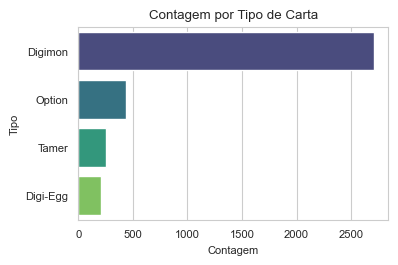

In [18]:
# Análise da coluna 'type'
print("Distribuição de Tipos de Carta:")
print(full_data_df['type'].value_counts())

plt.figure(figsize=(4, 2.5))
sns.countplot(y=full_data_df['type'], order=full_data_df['type'].value_counts().index, palette='viridis')
plt.title('Contagem por Tipo de Carta')
plt.xlabel('Contagem')
plt.ylabel('Tipo')
plt.show()

Distribuição de Raridades:
rarity
C          1267
U           902
R           761
SR          387
P           224
SEC          63
UNKNOWN       1
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_13928\2609064746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')


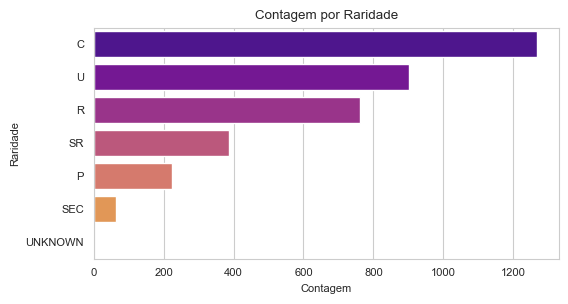

In [19]:
# Análise da coluna 'rarity'
print("Distribuição de Raridades:")
print(full_data_df['rarity'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')
plt.title('Contagem por Raridade')
plt.xlabel('Contagem')
plt.ylabel('Raridade')
plt.show()


Distribuição de Raridades Após a Limpeza:
rarity
C          1267
U           902
R           761
SR          387
P           224
SEC          63
UNKNOWN       1
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_13928\1360675509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')


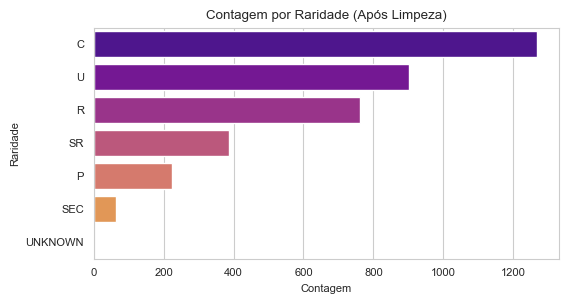

In [20]:
# Padronizando a coluna 'rarity' para letras maiúsculas
full_data_df['rarity'] = full_data_df['rarity'].str.upper()

# Verificando o resultado da limpeza
print("\nDistribuição de Raridades Após a Limpeza:")
print(full_data_df['rarity'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(y=full_data_df['rarity'], order=full_data_df['rarity'].value_counts().index, palette='plasma')
plt.title('Contagem por Raridade (Após Limpeza)')
plt.xlabel('Contagem')
plt.ylabel('Raridade')
plt.show()

Distribuição de Cores:
color
Purple    609
Red       595
Black     593
Blue      571
Green     558
Yellow    554
White     125
Name: count, dtype: int64


C:\Users\Paulo Aragao\AppData\Local\Temp\ipykernel_13928\3394996049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


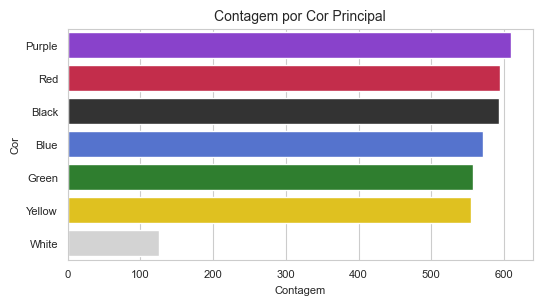

In [21]:
# 1. Criar o dicionário que mapeia o nome da cor para uma cor real
# Usamos 'gold' para Yellow e 'lightgray' para White para melhor visualização.
color_map = {
    'Purple': '#8A2BE2', # BlueViolet
    'Red': '#DC143C',    # Crimson
    'Black': '#333333',    # Um cinza bem escuro, quase preto
    'Blue': '#4169E1',   # RoyalBlue
    'Green': '#228B22',   # ForestGreen
    'Yellow': '#FFD700',  # Gold
    'White': '#D3D3D3'   # LightGray (para ser visível no fundo branco)
}

# 2. Obter a ordem correta das barras (da mais frequente para a menos)
# Isso garante que o Seaborn desenhe na ordem que queremos.
bar_order = full_data_df['color'].value_counts().index

# 3. Gerar o gráfico usando o nosso mapa de cores personalizado na paleta
print("Distribuição de Cores:")
print(full_data_df['color'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(
    y=full_data_df['color'], 
    order=bar_order,
    palette=color_map  # Aqui está a mágica! Passamos nosso mapa de cores.
)

plt.title('Contagem por Cor Principal', fontsize=10)
plt.xlabel('Contagem', fontsize=8)
plt.ylabel('Cor', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Resumo Estatístico das Colunas Numéricas:
         play_cost  evolution_cost            dp        level
count  3396.000000     2623.000000   2705.000000  2890.000000
mean      6.054181        2.411361   6519.778189     4.356055
std       3.438499        1.546032   3903.002555     1.295226
min       0.000000        0.000000      0.000000     2.000000
25%       3.000000        2.000000   4000.000000     3.000000
50%       5.000000        3.000000   6000.000000     4.000000
75%       8.000000        3.000000  10000.000000     5.000000
max      20.000000        8.000000  17000.000000     7.000000


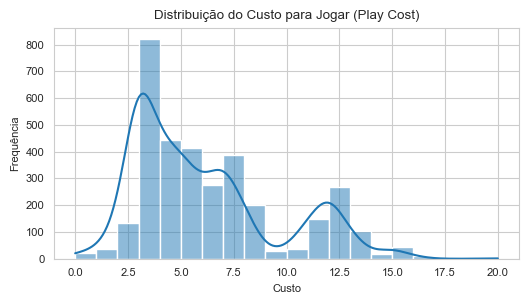

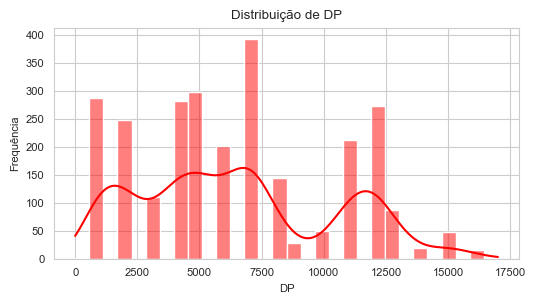

In [22]:
# Resumo estatístico das colunas numéricas
print("Resumo Estatístico das Colunas Numéricas:")
print(full_data_df[['play_cost', 'evolution_cost', 'dp', 'level']].describe())

# Histograma do Custo para Jogar (Play Cost)
plt.figure(figsize=(6, 3))
sns.histplot(full_data_df['play_cost'].dropna(), bins=20, kde=True)
plt.title('Distribuição do Custo para Jogar (Play Cost)')
plt.xlabel('Custo')
plt.ylabel('Frequência')
plt.show()

# Histograma do DP (Digimon Power)
plt.figure(figsize=(6, 3))
sns.histplot(full_data_df['dp'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribuição de DP')
plt.xlabel('DP')
plt.ylabel('Frequência')
plt.show()

In [23]:
# Função para converter a string em lista de forma segura
def converter_string_para_lista(valor):
    try:
        # Verifica se o valor é uma string antes de tentar a conversão
        if isinstance(valor, str):
            return ast.literal_eval(valor)
    except (ValueError, SyntaxError):
        # Se a string não for uma lista válida (ex: "NaN"), retorna uma lista vazia
        pass
    # Retorna uma lista vazia para valores nulos (NaN) ou erros de conversão
    return []

# Aplique a função na coluna 'set_name'
full_data_df['set_name'] = full_data_df['set_name'].apply(converter_string_para_lista)

# --- APLIQUE OUTRAS LIMPEZAS QUE FIZEMOS, COMO NA RARIDADE ---
full_data_df['rarity'] = full_data_df['rarity'].str.upper()



In [25]:
# Filtrar apenas as cartas cuja raridade é 'C' ou 'U'
filtered_df = full_data_df[full_data_df['rarity'].isin(['C', 'U'])]

# Exibir informações gerais sobre o DataFrame filtrado
print(f"Número de cartas com raridade 'C' ou 'U': {len(filtered_df)}")
display(filtered_df.head())

Número de cartas com raridade 'C' ou 'U': 2169


,name,type,id,level,play_cost,evolution_cost,evolution_color,evolution_level,xros_req,color,...,artist,main_effect,source_effect,alt_effect,series,pretty_url,date_added,tcgplayer_name,tcgplayer_id,set_name
0,A Blazing Storm of Metal!,Option,BT5-103,NaN,1.0,NaN,NaN,NaN,NaN,Black,...,NaN,[Main] Until the end of your opponent's next t...,Security Effect [Security] Your opponent's Dig...,NaN,Digimon Card Game,a-blazing-storm-of-metal-bt5-103,2024-05-27 15:14:30,A Blazing Storm of Metal!,245181.0,[BT-05: Booster Battle Of Omni]
1,A Delicate Plan,Option,BT3-097,NaN,1.0,NaN,NaN,NaN,NaN,Red,...,NaN,"[Main] 1 of your Digimon gains ""[Security] eff...",Security Effect [Security] Add this card to th...,NaN,Digimon Card Game,a-delicate-plan-bt3-097,2024-05-27 15:14:30,A Delicate Plan,231742.0,"[BT-03: Booster Union Impact, BT01-03: Release..."
5,Absolute Blast,Option,BT5-097,NaN,6.0,NaN,NaN,NaN,NaN,Blue,...,NaN,[Main] Trash the bottom digivolution card of 1...,Security Effect [Security] Activate this card'...,NaN,Digimon Card Game,absolute-blast-bt5-097,2024-05-27 15:14:30,Absolute Blast,245150.0,"[BT-05: Booster Battle Of Omni, Summer 2022 Da..."
7,Achillesmon,Digimon,BT16-047,6.0,11.0,3.0,NaN,NaN,[Digivolve] Lv.5 w/[Pulsemon] in text: Cost 3,Green,...,NaN,[When Digivolving] Suspend 1 of your opponent'...,NaN,[Digivolve] Lv.5 w/[Pulsemon] in text: Cost 3,Digimon Card Game,achillesmon-bt16-047,2024-05-27 15:14:30,Achillesmon,548430.0,[BT-16: Booster Beginning Observer]
8,Acid Injection,Option,BT6-099,NaN,1.0,NaN,NaN,NaN,NaN,Yellow,...,NaN,[Main] Trash the top card of your security sta...,Security Effect [Security] Add this card to th...,NaN,Digimon Card Game,acid-injection-bt6-099,2024-05-27 15:14:30,Acid Injection,249710.0,[BT-06: Booster Double Diamond]


In [27]:
# Exemplo de como salvar o DataFrame limpo em um novo CSV
filtered_df.to_csv('../data/digimon_cards_clean.csv', index=False)

# E para gerar o JSON que a sua aplicação web vai usar:
filtered_df.to_json('../data/digimon_cards_full.json', orient='records', indent=2)